# Data analysis for internship task for Quantum



Import required libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Import data to pandas DataFrame

In [33]:
df_train = pd.read_csv("internship_train.csv")
df_test = pd.read_csv("internship_hidden_test.csv")

Check data


In [34]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [35]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


In [36]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


In [37]:
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,248.387400,250.191800,248.064900,249.992200,251.642200,249.678600,-0.079268,0.505215,0.492200,245.823600,...,7.422179,7.488576,7.526853,7.449717,7.438931,7.563141,7.510016,7.465383,7.503378,7.503662
std,144.124521,144.850399,144.792255,144.015371,144.745324,144.677689,7.032273,0.285678,0.499964,142.852057,...,4.335234,4.321760,4.340501,4.328863,4.308985,4.347630,4.353635,4.363206,4.338020,4.291431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000260,0.000000,0.000000,...,0.000310,0.001103,0.000545,0.001244,0.000026,0.001580,0.000286,0.001716,0.000834,0.000132
25%,123.000000,123.000000,123.000000,128.000000,125.000000,124.000000,-7.071068,0.261199,0.000000,122.000000,...,3.707353,3.758763,3.762664,3.711092,3.753059,3.805891,3.734299,3.696070,3.758126,3.810301
50%,249.000000,251.000000,246.000000,252.000000,252.000000,249.000000,-1.000000,0.507519,0.000000,244.000000,...,7.371637,7.531310,7.550432,7.361451,7.377399,7.627437,7.547184,7.441250,7.500340,7.429109
75%,373.000000,377.000000,375.000000,373.000000,379.000000,374.000000,7.071068,0.750603,1.000000,368.000000,...,11.147130,11.193657,11.311366,11.201442,11.154313,11.338666,11.276399,11.297861,11.268075,11.209570
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999982,1.000000,499.000000,...,14.997599,14.999511,14.999954,14.998273,14.998069,14.999790,14.999314,14.999992,14.998473,14.997318


In [38]:
df_train.shape

(90000, 54)

In [39]:
df_test.shape

(10000, 53)

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  int64  
 1   1       10000 non-null  int64  
 2   2       10000 non-null  int64  
 3   3       10000 non-null  int64  
 4   4       10000 non-null  int64  
 5   5       10000 non-null  int64  
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  int64  
 9   9       10000 non-null  int64  
 10  10      10000 non-null  int64  
 11  11      10000 non-null  int64  
 12  12      10000 non-null  int64  
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
 21  21      10000 non-null  float64
 22 

<font color = 'red' size = 4>Columns values differ from each other by max and min. Let's take this into account when building the model. 
Data type of all features is numerical (int and float). No categorical data.</font>

Take a look for NaN values


0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64

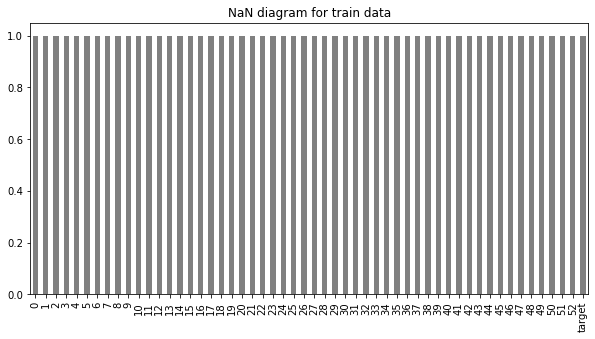

In [40]:
fig, ax = plt.subplots(figsize = (10,5))
(1-df_train.isna()).mean().abs().plot.bar(ax=ax, color = 'gray')
ax.set_title('NaN diagram for train data')
df_train.isna().sum()

<font color='red' size = 4>No NaN values found for train data!</font> 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
dtype: int64

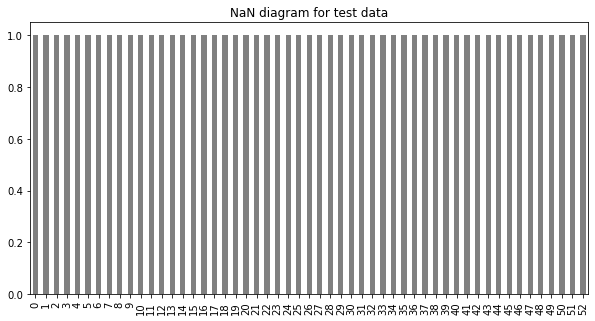

In [41]:
fig, ax = plt.subplots(figsize = (10,5))
(1-df_test.isna()).mean().abs().plot.bar(ax=ax, color = 'gray')
ax.set_title('NaN diagram for test data')
df_test.isna().sum()

<font color='red' size = 4>No NaN values found for test data!</font> 

Write a function to check correlation with some threshold value (one feature - target)

In [42]:
def check_corr(df_feature, target, threshold):
    for col in df_feature.columns:
        correlation = df_feature[col].corr(target)
        if correlation >= math.fabs(threshold):
            return col


Check correlation for all features and target with different thresholds


In [43]:
df_train_features = df_train.drop(columns = ['target'], inplace = False)
df_train_target = df_train['target']
for t in np.arange(0.1, 1.1, 0.1):
    print('correlation over or equal with target: ' + str(round(t, 2)) + ' columns:' + str(check_corr(df_train_features, df_train_target, t)))

correlation over or equal with target: 0.1 columns:None
correlation over or equal with target: 0.2 columns:None
correlation over or equal with target: 0.3 columns:None
correlation over or equal with target: 0.4 columns:None
correlation over or equal with target: 0.5 columns:None
correlation over or equal with target: 0.6 columns:None
correlation over or equal with target: 0.7 columns:None
correlation over or equal with target: 0.8 columns:None
correlation over or equal with target: 0.9 columns:None
correlation over or equal with target: 1.0 columns:None


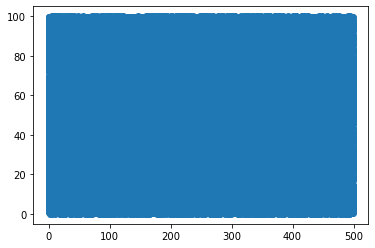

In [44]:
plt.scatter(df_train['12'], df_train['target'])

<font color = 'red' size = 4> Straight correlation between each feature and target not found!</font>

Let's take a look at correlation between features

In [45]:
df_train.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(10)

target  target    1.000000
8       6         0.940016
7       target    0.012103
31      33        0.011606
26      49        0.010444
1       33        0.010357
4       43        0.009656
35      24        0.009283
25      35        0.009278
31      22        0.009036
dtype: float64

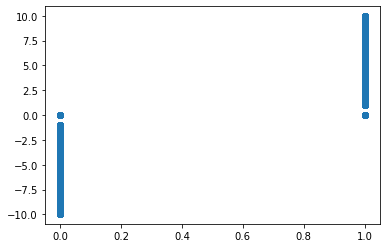

In [48]:
plt.scatter(df_train['8'], df_train['6'])

<font color = 'red' size = 4>Found out an intresting correlation between 8 and 6 features.</font>

<font color = 'green' size = 5>For deeper analysis needs more information about data!</font>